In [1]:
import os 
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.stats as stats
#import seaborn as sns
%matplotlib inline
#from stats import mean, median, mode, multi_mode

In [2]:
nba_hurt = pd.read_csv('nba_hurtsv2.csv')
nba_hurt.head()
nba_hurt = nba_hurt.drop([0], axis = 0)
nba_hurt.dropna(how = "any")

Date          Team             name  \
1       10/3/2010         Bulls    Carlos Boozer   
2       10/3/2010         Bulls    Carlos Boozer   
3       10/3/2010         Bulls    Carlos Boozer   
4       10/3/2010         Bulls    Carlos Boozer   
5       10/3/2010         Bulls    Carlos Boozer   
...           ...           ...              ...   
157034   4/3/2018         Kings  Skal Labissiere   
157035   4/6/2018      Pelicans        Ian Clark   
157036   4/8/2018          Suns     Josh Jackson   
157037  4/23/2018  Timberwolves       Tyus Jones   
157038  4/26/2018       Nuggets    Mason Plumlee   

                                                    Notes  year_start  \
1       fractured bone in right pinky finger (out inde...        2003   
2       fractured bone in right pinky finger (out inde...        2003   
3       fractured bone in right pinky finger (out inde...        2003   
4       fractured bone in right pinky finger (out inde...        2003   
5       fractured bone in right pinky finger (out inde...        2003   
...                                                   ...         ...   
157034               sprained left ankle (out for season)        2017   
157035                         sprained right ankle (DTD)        2014   
157036          bruised right quadriceps (out for season)        2018   
157037                              sore right knee (DTD)        2016   
157038               surgery to repair core muscle injury        2014   

        year_end position  weight  birth_date                 college  ...  \
1           2015      F-C     258  11/20/1981         Duke University  ...   
2           2015      F-C     258  11/20/1981         Duke University  ...   
3           2015      F-C     258  11/20/1981         Duke University  ...   
4           2015      F-C     258  11/20/1981         Duke University  ...   
5           2015      F-C     258  11/20/1981         Duke University  ...   
...          ...      ...     ...         ...                     ...  ...   
157034      2018        F     225   3/18/1996  University of Kentucky  ...   
157035      2018        G     175    3/7/1991      Belmont University  ...   
157036      2018      G-F     207   2/10/1997    University of Kansas  ...   
157037      2018        G     195   5/10/1996         Duke University  ...   
157038      2018      F-C     245    3/5/1990         Duke University  ...   

         BMI  BMI ranges  Unnamed: 0  Strains/Sprains  Dislocations  \
1       28.6     28.5-29         221             True         False   
2       28.6     28.5-29         227             True         False   
3       28.6     28.5-29         230             True         False   
4       28.6     28.5-29        2092             True         False   
5       28.6     28.5-29        2105             True         False   
...      ...         ...         ...              ...           ...   
157034  23.7     23.5-24        6175             True         False   
157035  22.6     22.5-23        6187             True         False   
157036  23.5     23-23.5        6191            False         False   
157037  25.9     25.5-26        6207            False         False   
157038  25.8     25.5-26        6208            False         False   

        Arm Fractures Leg Fractures    Injury Type  \
1               False         False  Strain/Sprain   
2               False         False  Strain/Sprain   
3               False         False  Strain/Sprain   
4               False         False  Strain/Sprain   
5               False         False  Strain/Sprain   
...               ...           ...            ...   
157034          False         False  Strain/Sprain   
157035          False         False  Strain/Sprain   
157036          False         False       No Index   
157037          False         False       No Index   
157038          False         False       No Index   

        Estimated Medical Costs (2012)  age  
1                         

In [3]:
# age = nba_hurt["birth_date"].str.split("/", n = 2, expand = True)
# date= nba_hurt["Date"].str.split('/', n = 2, expand = True)
# age = age[0]
# date= date[0]

In [4]:
# age = pd.to_numeric(age)
# date = pd.to_numeric(date)

In [5]:
# date2 = date.iloc[1:12432]
# age2 = age.iloc[1:12432]

In [6]:
age_bins = [0,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,60]
group_names = ["0-16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", 
          "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "40+"]

nba_hurt["Injury Age"] = pd.cut(nba_hurt["age"], age_bins, labels =group_names)

In [7]:
inj_age_df = nba_hurt.groupby(["Injury Age"])
inj_age_count = inj_age_df["Injury Age"].count()
inj_age_count

Injury Age
0-16        0
17          0
18          1
19       1349
20       1896
21       4308
22       7140
23      10693
24      12909
25      15036
26      15043
27      17165
28      14205
29      13831
30       8880
31       7776
32       8130
33       5463
34       2669
35       2578
36       1047
37        892
38       1396
39       1117
40        826
40+       376
Name: Injury Age, dtype: int64

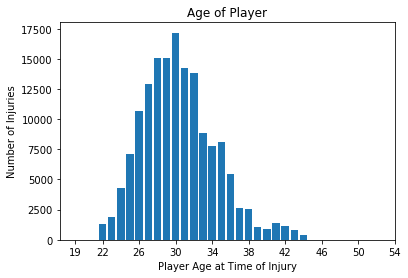

In [49]:
x_axis = np.arange(0,len(inj_age_count),1)
plt.bar(x_axis,inj_age_count, label="Age of Player ", align = "center")
plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Player Age at Time of Injury")
plt.ylabel("Number of Injuries")
plt.title("Age of Player")
plt.savefig("Injuries_Age.png")

In [9]:
agesprains = nba_hurt.groupby(["Injury Age",'Strains/Sprains'])[['Strains/Sprains']].count()
agesprains_count = inj_age_df["Strains/Sprains"].sum()
agesprains_count

Injury Age
0-16       0.0
17         0.0
18         0.0
19       466.0
20       598.0
21      1330.0
22      1782.0
23      3584.0
24      2809.0
25      3812.0
26      4132.0
27      5519.0
28      3767.0
29      3861.0
30      2962.0
31      2609.0
32      2434.0
33      1320.0
34       651.0
35       547.0
36       232.0
37       192.0
38       186.0
39       250.0
40       245.0
40+       14.0
Name: Strains/Sprains, dtype: float64

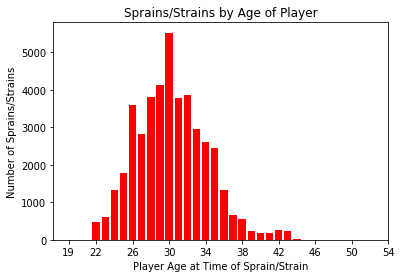

In [63]:
x_axis = np.arange(0,len(agesprains_count),1)
plt.bar(x_axis,agesprains_count, label="Age of Player ", color= "r", align = "center")
plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Player Age at Time of Sprain/Strain")
plt.ylabel("Number of Sprains/Strains")
plt.title("Sprains/Strains by Age of Player")
plt.savefig("Sprains_Age.png")

In [11]:
agedislocations = nba_hurt.groupby(["Injury Age",'Dislocations'])[['Dislocations']].count()
agedislocations_count = inj_age_df["Dislocations"].sum()
agedislocations_count

Injury Age
0-16      0.0
17        0.0
18        0.0
19        0.0
20        2.0
21        5.0
22       27.0
23       13.0
24       31.0
25       36.0
26       24.0
27       41.0
28      180.0
29       34.0
30       20.0
31       20.0
32       24.0
33        6.0
34       19.0
35       10.0
36        0.0
37        0.0
38        0.0
39        0.0
40        0.0
40+       0.0
Name: Dislocations, dtype: float64

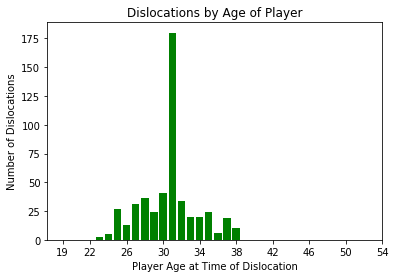

In [51]:
x_axis = np.arange(0,len(agedislocations_count),1)
plt.bar(x_axis,agedislocations_count, label="Age of Player ", color="g", align = "center")
plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Player Age at Time of Dislocation")
plt.ylabel("Number of Dislocations")
plt.title("Dislocations by Age of Player")
plt.savefig("Dislocations_Age.png")

In [13]:
agearmbreak = nba_hurt.groupby(["Injury Age",'Arm Fractures'])[['Arm Fractures']].count()
agearmbreak_count = inj_age_df["Arm Fractures"].sum()
agearmbreak_count

Injury Age
0-16       0.0
17         0.0
18         0.0
19         2.0
20        32.0
21        16.0
22       238.0
23       382.0
24      1523.0
25       224.0
26       198.0
27       266.0
28       332.0
29       225.0
30        38.0
31        31.0
32        28.0
33        27.0
34        14.0
35         6.0
36         0.0
37         0.0
38         0.0
39         0.0
40         0.0
40+        0.0
Name: Arm Fractures, dtype: float64

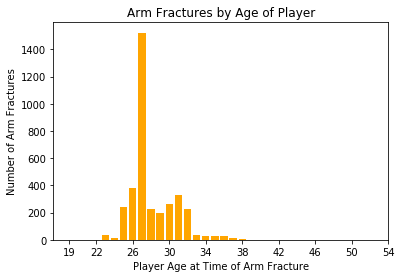

In [52]:
x_axis = np.arange(0,len(agearmbreak_count),1)
plt.bar(x_axis,agearmbreak_count, label="Age of Player ", color="orange", align = "center")
plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Player Age at Time of Arm Fracture")
plt.ylabel("Number of Arm Fractures")
plt.title("Arm Fractures by Age of Player")
plt.savefig("ArmFractures_Age.png")

In [15]:
agelegbreaks = nba_hurt.groupby(["Injury Age",'Leg Fractures'])[['Leg Fractures']].count()
agelegbreaks_count = inj_age_df["Leg Fractures"].sum()
agelegbreaks_count

Injury Age
0-16     0.0
17       0.0
18       0.0
19       4.0
20      10.0
21      10.0
22      52.0
23      43.0
24      42.0
25      54.0
26      44.0
27      31.0
28      29.0
29      52.0
30      11.0
31      25.0
32      19.0
33      11.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
40+      0.0
Name: Leg Fractures, dtype: float64

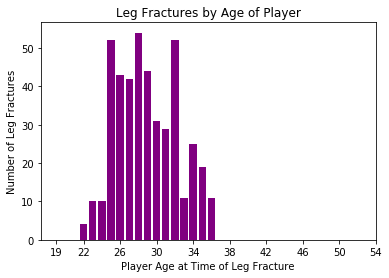

In [53]:
x_axis = np.arange(0,len(agelegbreaks_count),1)
plt.bar(x_axis,agelegbreaks_count, label="Age of Player ", color="purple", align = "center")
plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Player Age at Time of Leg Fracture")
plt.ylabel("Number of Leg Fractures")
plt.title("Leg Fractures by Age of Player")
plt.savefig("LegFractures_Age.png")

In [17]:
inj_school = nba_hurt.groupby(["college"])
inj_school_count = inj_school["college"].count()
inj_school_count

college
Alabama A&M University            9
Arizona State University        266
Auburn University                25
Baylor University               908
Belmont University                1
                               ... 
Western Carolina University    1369
Western Kentucky University     290
Western Michigan University       1
Wichita State University        470
Xavier University               147
Name: college, Length: 146, dtype: int64

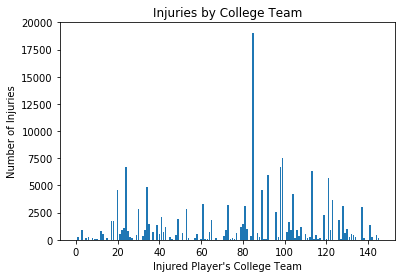

In [55]:
x_axis = np.arange(0,len(inj_school_count),1)
plt.bar(x_axis,inj_school_count, label="Injuries by College Team", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's College Team")
plt.ylabel("Number of Injuries")
plt.title("Injuries by College Team")
plt.savefig("Injuries_Schools.png")

In [19]:
schoolsprains = nba_hurt.groupby(["college",'Strains/Sprains'])[['Strains/Sprains']].count()
schoolsprains_count = inj_school["Strains/Sprains"].sum()
schoolsprains_count

college
Alabama A&M University           0.0
Arizona State University        83.0
Auburn University                0.0
Baylor University              280.0
Belmont University               1.0
                               ...  
Western Carolina University    740.0
Western Kentucky University    144.0
Western Michigan University      0.0
Wichita State University        10.0
Xavier University               26.0
Name: Strains/Sprains, Length: 146, dtype: float64

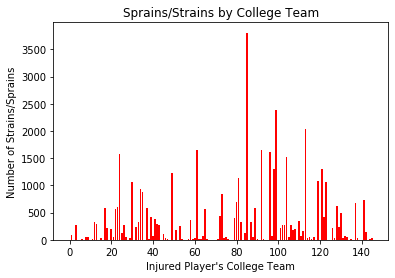

In [62]:
x_axis = np.arange(0,len(schoolsprains_count),1)
plt.bar(x_axis,schoolsprains_count, label="Strains by College Team", color= "r", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's College Team")
plt.ylabel("Number of Strains/Sprains")
plt.title("Sprains/Strains by College Team")
plt.savefig("Sprains_Schools.png")

In [21]:
schooldislocations = nba_hurt.groupby(["college",'Dislocations'])[['Dislocations']].count()
schooldislocations_count = inj_school["Dislocations"].sum()
schooldislocations_count

college
Alabama A&M University         0.0
Arizona State University       0.0
Auburn University              0.0
Baylor University              0.0
Belmont University             0.0
                              ... 
Western Carolina University    0.0
Western Kentucky University    0.0
Western Michigan University    0.0
Wichita State University       0.0
Xavier University              0.0
Name: Dislocations, Length: 146, dtype: float64

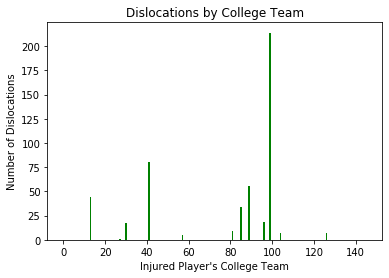

In [57]:
x_axis = np.arange(0,len(schooldislocations_count),1)
plt.bar(x_axis,schooldislocations_count, label="Dislocations by College Team", color= "g", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's College Team")
plt.ylabel("Number of Dislocations")
plt.title("Dislocations by College Team")
plt.savefig("Dislocations_Schools.png")

In [23]:
schoolarmbreaks = nba_hurt.groupby(["college",'Arm Fractures'])[['Arm Fractures']].count()
schoolarmbreaks_count = inj_school["Arm Fractures"].sum()
schoolarmbreaks_count

college
Alabama A&M University          0.0
Arizona State University        0.0
Auburn University               0.0
Baylor University               0.0
Belmont University              0.0
                               ... 
Western Carolina University    37.0
Western Kentucky University     0.0
Western Michigan University     0.0
Wichita State University        0.0
Xavier University               0.0
Name: Arm Fractures, Length: 146, dtype: float64

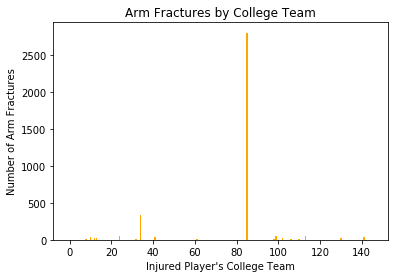

In [58]:
x_axis = np.arange(0,len(schoolarmbreaks_count),1)
plt.bar(x_axis,schoolarmbreaks_count, label="Arm Fractures by College Team", color= "orange", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's College Team")
plt.ylabel("Number of Arm Fractures")
plt.title("Arm Fractures by College Team")
plt.savefig("ArmFractures_Schools.png")

In [25]:
schoollegbreaks = nba_hurt.groupby(["college",'Leg Fractures'])[['Leg Fractures']].count()
schoollegbreaks_count = inj_school["Leg Fractures"].sum()
schoollegbreaks_count

college
Alabama A&M University          0.0
Arizona State University        0.0
Auburn University               0.0
Baylor University               0.0
Belmont University              0.0
                               ... 
Western Carolina University    37.0
Western Kentucky University     0.0
Western Michigan University     0.0
Wichita State University        0.0
Xavier University               0.0
Name: Leg Fractures, Length: 146, dtype: float64

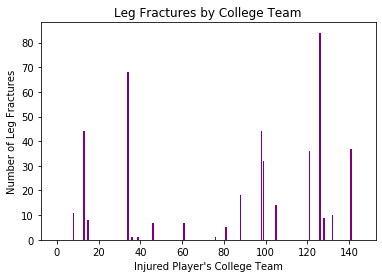

In [59]:
x_axis = np.arange(0,len(schoollegbreaks_count),1)
plt.bar(x_axis,schoollegbreaks_count, label="Leg Fractures by College Team", color= "purple", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's College Team")
plt.ylabel("Number of Leg Fractures")
plt.title("Leg Fractures by College Team")
plt.savefig("LegFractures_Schools.png")

In [27]:
inj_team = nba_hurt.groupby(["Team"])
inj_team_count = inj_team["Team"].count()
inj_team_count

Team
76ers           5177
Blazers         2872
Bobcats         2606
Bucks           7085
Bulls           6099
Cavaliers       6222
Celtics         4085
Clippers        6240
Grizzlies       5764
Hawks           2499
Heat            3642
Hornets         8389
Jazz            4284
Kings           4179
Knicks          3973
Lakers          8718
Magic           7597
Mavericks       4264
Nets            6254
Nuggets         7146
Pacers          2831
Pelicans        8433
Pistons         2896
Raptors         2790
Rockets         4990
Spurs           3525
Suns            2224
Thunder          808
Timberwolves    9123
Warriors        7085
Wizards         5238
Name: Team, dtype: int64

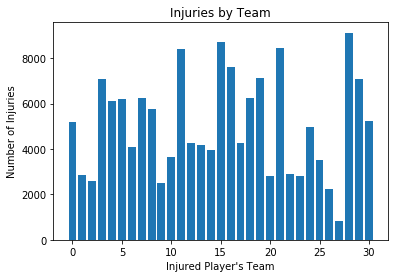

In [60]:
x_axis = np.arange(0,len(inj_team_count),1)
plt.bar(x_axis,inj_team_count, label="Injuries by Team", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's Team")
plt.ylabel("Number of Injuries")
plt.title("Injuries by Team")
plt.savefig("Injuries_Teams.png")

In [29]:
teamsprains = nba_hurt.groupby(["Team",'Strains/Sprains'])[['Strains/Sprains']].count()
teamsprains_count = inj_team["Strains/Sprains"].sum()
teamsprains_count

Team
76ers           1183.0
Blazers          729.0
Bobcats          680.0
Bucks           2007.0
Bulls           1751.0
Cavaliers       1690.0
Celtics         1402.0
Clippers        1380.0
Grizzlies        928.0
Hawks            609.0
Heat             876.0
Hornets         2169.0
Jazz            1619.0
Kings           1148.0
Knicks          1314.0
Lakers          1736.0
Magic           2998.0
Mavericks       1569.0
Nets            2100.0
Nuggets         2479.0
Pacers           966.0
Pelicans        1517.0
Pistons         1072.0
Raptors          725.0
Rockets         1521.0
Spurs            867.0
Suns             627.0
Thunder          201.0
Timberwolves    2244.0
Warriors        2778.0
Wizards         1505.0
Name: Strains/Sprains, dtype: float64

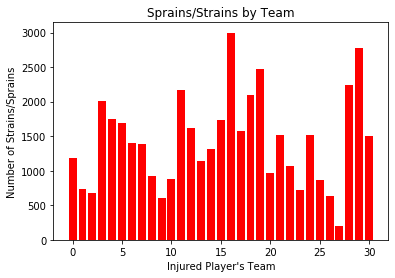

In [61]:
x_axis = np.arange(0,len(teamsprains_count),1)
plt.bar(x_axis,teamsprains_count, label="Strains by Team", color= "r", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's Team")
plt.ylabel("Number of Strains/Sprains")
plt.title("Sprains/Strains by Team")
plt.savefig("Sprains_Teams.png")

In [31]:
teamdislocations = nba_hurt.groupby(["Team",'Dislocations'])[['Dislocations']].count()
teamdislocations_count = inj_team["Dislocations"].sum()
teamdislocations_count

Team
76ers            11.0
Blazers          23.0
Bobcats           0.0
Bucks            17.0
Bulls            16.0
Cavaliers        17.0
Celtics           4.0
Clippers          3.0
Grizzlies         8.0
Hawks             0.0
Heat             62.0
Hornets           0.0
Jazz             40.0
Kings           198.0
Knicks            6.0
Lakers           19.0
Magic             7.0
Mavericks         0.0
Nets              0.0
Nuggets           0.0
Pacers            0.0
Pelicans          0.0
Pistons           6.0
Raptors          15.0
Rockets          27.0
Spurs             4.0
Suns              5.0
Thunder           0.0
Timberwolves      3.0
Warriors          0.0
Wizards           1.0
Name: Dislocations, dtype: float64

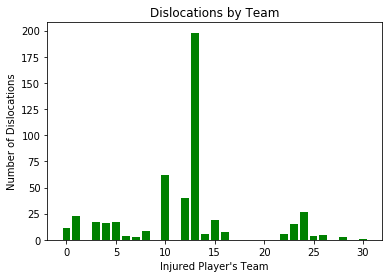

In [64]:
x_axis = np.arange(0,len(teamdislocations_count),1)
plt.bar(x_axis,teamdislocations_count, label="Dislocations by Team", color= "g", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's Team")
plt.ylabel("Number of Dislocations")
plt.title("Dislocations by Team")
plt.savefig("Dislocations_Teams.png")

In [33]:
teamarmbreaks = nba_hurt.groupby(["Team",'Arm Fractures'])[['Arm Fractures']].count()
teamarmbreaks_count = inj_team["Arm Fractures"].sum()
teamarmbreaks_count

Team
76ers             54.0
Blazers            6.0
Bobcats           10.0
Bucks             11.0
Bulls             21.0
Cavaliers        866.0
Celtics           35.0
Clippers          65.0
Grizzlies          2.0
Hawks              7.0
Heat              31.0
Hornets          130.0
Jazz              43.0
Kings             12.0
Knicks            34.0
Lakers             6.0
Magic             13.0
Mavericks          4.0
Nets               0.0
Nuggets            2.0
Pacers             0.0
Pelicans         101.0
Pistons            0.0
Raptors            0.0
Rockets           70.0
Spurs             24.0
Suns              26.0
Thunder            4.0
Timberwolves    2002.0
Warriors           1.0
Wizards            2.0
Name: Arm Fractures, dtype: float64

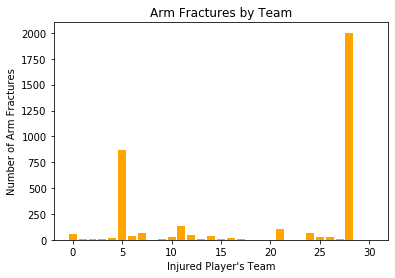

In [65]:
x_axis = np.arange(0,len(teamarmbreaks_count),1)
plt.bar(x_axis,teamarmbreaks_count, label="Arm Fractures by Team", color= "orange", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's Team")
plt.ylabel("Number of Arm Fractures")
plt.title("Arm Fractures by Team")
plt.savefig("ArmFractures_Teams.png")

In [35]:
teamlegbreaks = nba_hurt.groupby(["Team",'Leg Fractures'])[['Leg Fractures']].count()
teamlegbreaks_count = inj_team["Leg Fractures"].sum()
teamlegbreaks_count

Team
76ers           13.0
Blazers          1.0
Bobcats          0.0
Bucks           59.0
Bulls            1.0
Cavaliers        2.0
Celtics         20.0
Clippers        13.0
Grizzlies       17.0
Hawks            7.0
Heat             0.0
Hornets         26.0
Jazz            58.0
Kings            0.0
Knicks           2.0
Lakers          18.0
Magic            1.0
Mavericks       16.0
Nets            15.0
Nuggets         30.0
Pacers           6.0
Pelicans        24.0
Pistons          0.0
Raptors          8.0
Rockets         32.0
Spurs            1.0
Suns             2.0
Thunder          5.0
Timberwolves    15.0
Warriors        44.0
Wizards          1.0
Name: Leg Fractures, dtype: float64

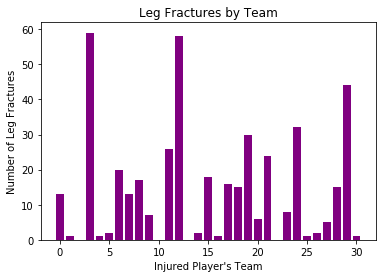

In [66]:
x_axis = np.arange(0,len(teamlegbreaks_count),1)
plt.bar(x_axis,teamlegbreaks_count, label="Leg Fractures by Team", color= "purple", align = "center")
#plt.xticks([0,3,7,11,15,19,23,27,31,35],["19","22","26","30","34","38","42","46","50","54"] )
plt.xlabel("Injured Player's Team")
plt.ylabel("Number of Leg Fractures")
plt.title("Leg Fractures by Team")
plt.savefig("LegFractures_Teams.png")

In [37]:
inj_position = nba_hurt.groupby(["position"])
inj_position_count = inj_position["position"].count()
inj_position_count

position
C       9495
F      41338
F-C    21468
G      69034
G-F    15703
Name: position, dtype: int64

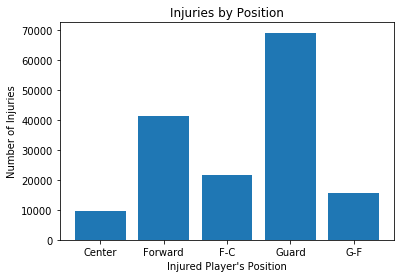

In [67]:
x_axis = np.arange(0,len(inj_position_count),1)
plt.bar(x_axis,inj_position_count, label="Injuries by Position", align = "center")
plt.xticks([0,1,2,3,4],["Center","Forward","F-C","Guard","G-F"] )
plt.xlabel("Injured Player's Position")
plt.ylabel("Number of Injuries")
plt.title("Injuries by Position")
plt.savefig("Injuries_Positions.png")

In [39]:
positionsprains = nba_hurt.groupby(["position",'Strains/Sprains'])[['Strains/Sprains']].count()
positionsprains_count = inj_position["Strains/Sprains"].sum()
positionsprains_count

position
C       2641.0
F      11688.0
F-C     4457.0
G      22691.0
G-F     2913.0
Name: Strains/Sprains, dtype: float64

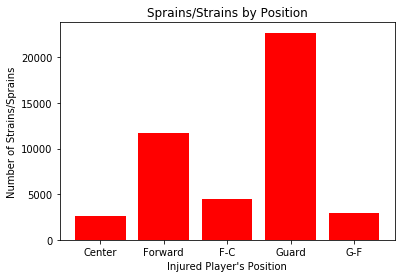

In [68]:
x_axis = np.arange(0,len(positionsprains_count),1)
plt.bar(x_axis,positionsprains_count, label="Strains by Position", color= "r", align = "center")
plt.xticks([0,1,2,3,4],["Center","Forward","F-C","Guard","G-F"] )
plt.xlabel("Injured Player's Position")
plt.ylabel("Number of Strains/Sprains")
plt.title("Sprains/Strains by Position")
plt.savefig("Sprains_Positions.png")

In [41]:
positiondislocations = nba_hurt.groupby(["position",'Dislocations'])[['Dislocations']].count()
positiondislocations_count = inj_position["Dislocations"].sum()
positiondislocations_count

position
C        0.0
F       91.0
F-C    213.0
G      144.0
G-F     44.0
Name: Dislocations, dtype: float64

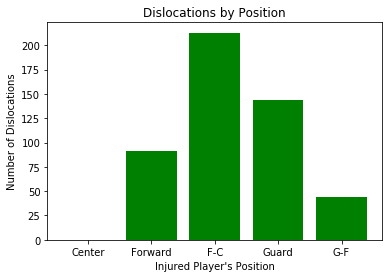

In [69]:
x_axis = np.arange(0,len(positiondislocations_count),1)
plt.bar(x_axis,positiondislocations_count, label="Dislocations by Position", color= "g", align = "center")
plt.xticks([0,1,2,3,4],["Center","Forward","F-C","Guard","G-F"] )
plt.xlabel("Injured Player's Position")
plt.ylabel("Number of Dislocations")
plt.title("Dislocations by Position")
plt.savefig("Dislocations_Positions.png")

In [43]:
positionarmbreaks = nba_hurt.groupby(["position",'Arm Fractures'])[['Arm Fractures']].count()
positionarmbreaks_count = inj_position["Arm Fractures"].sum()
positionarmbreaks_count

position
C        23.0
F      2873.0
F-C      25.0
G       592.0
G-F      69.0
Name: Arm Fractures, dtype: float64

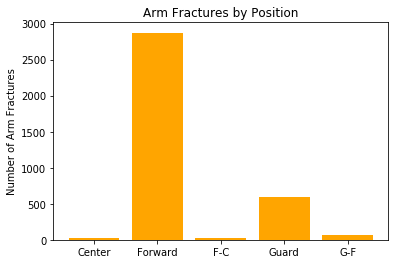

In [70]:
x_axis = np.arange(0,len(positionarmbreaks_count),1)
plt.bar(x_axis,positionarmbreaks_count, label="Arm Fractures by Position", color= "orange", align = "center")
plt.xticks([0,1,2,3,4],["Center","Forward","F-C","Guard","G-F"] )
plt.ylabel("Number of Arm Fractures")
plt.title("Arm Fractures by Position")
plt.savefig("Arm Fractures_Positions.png")

In [45]:
positionlegbreaks = nba_hurt.groupby(["position",'Leg Fractures'])[['Leg Fractures']].count()
positionlegbreaks_count = inj_position["Leg Fractures"].sum()
positionlegbreaks_count

position
C       84.0
F       74.0
F-C     27.0
G      183.0
G-F     69.0
Name: Leg Fractures, dtype: float64

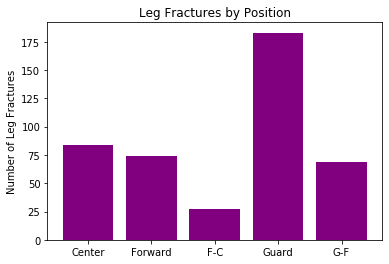

In [71]:
x_axis = np.arange(0,len(positionlegbreaks_count),1)
plt.bar(x_axis,positionlegbreaks_count, label="Leg Fractures by Position", color= "purple", align = "center")
plt.xticks([0,1,2,3,4],["Center","Forward","F-C","Guard","G-F"] )
plt.ylabel("Number of Leg Fractures")
plt.title("Leg Fractures by Position")
plt.savefig("Leg Fractures_Positions.png")